In [1]:
pip install bs4

爬蟲

In [2]:
from bs4 import BeautifulSoup as bs
import json
import requests

In [3]:
def Data(a):
    response = requests.get("https://d.guduodata.com/m/show/detail/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data = json.loads(data_string)
    Type.append(data['type'])
    name.append(data['show_name'])
    date.append(data['release_date'])
    
    response = requests.get("https://d.guduodata.com/m/show/audience_analysis/id/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data1 = json.loads(data_string)
    male.append(data1['data']['sex']['baidu']['M'])
    female.append(data1['data']['sex']['baidu']['F'])
    age.append(data1['data']['age']['baidu']['first']['rank_desc'])
    age1.append(data1['data']['age']['baidu']['second']['rank_desc'])

    
    response = requests.get("https://d.guduodata.com/m/media/douban_basic/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data2 = json.loads(data_string)
    score.append(data2['score'])

裝進list

In [5]:
name = []
Type = []
date = []
male = []
female = []
age = []
age1 = []
score = []

b2019 = [23406,16490,23258,21396,13343,21270,21394,23340,23257,23197,23338,21600,23297,21391,23136,23318,23098,23025,
         23019,23317,23192,14229,23407,23013,17016,23163,23347,13039,23298,23259,23341,22676,16347,22819,23058,22610,17387,
        23037,21405,22738,22959,23418,23121,23014,23337,22827,22976,22678]
for i in range(47):
    Data(b2019[i])

data2019
dataframe含'劇名''題材''日期''男(%)''女(%)''年齡第一多''年齡第二多''豆瓣評分'

In [6]:
import pandas as pd
data2019 = pd.DataFrame({'劇名':name,'題材':Type,'日期':date,'男(%)':male,
                         '女(%)':female,'年齡0':age,'年齡1':age1,'豆瓣評分':score})

In [7]:
data2019['男(%)'] = data2019['男(%)'].str.replace('%', '')
data2019['女(%)'] = data2019['女(%)'].str.replace('%', '')
data2019['年齡0'] = data2019['年齡0'].str.replace('岁', '')
data2019['年齡1'] = data2019['年齡1'].str.replace('岁', '')
data2019['題材'] = data2019['題材'].str.replace('/', '')

In [8]:
data2019

,劇名,題材,日期,男(%),女(%),年齡0,年齡1,豆瓣評分
0,王牌部队,现代军旅,2021-12-26,43.1,56.9,25-34,19-24,0.0
1,雪中悍刀行,武侠古代,2021-12-15,65.45,34.55,25-34,19-24,5.8
2,风起洛阳,悬疑IP改编古代,2021-12-01,35.5,64.5,25-34,19-24,6.3
3,小敏家,现代家庭都市,2021-12-11,30.61,69.39,25-34,19-24,6.1
4,斛珠夫人,古偶IP改编爱情,2021-11-10,13.1,86.9,19-24,25-34,4.8
5,谁是凶手,现代悬疑涉案,2021-12-05,33.34,66.66,19-24,25-34,6.2
6,女心理师,现代都市情感,2021-11-23,13.77,86.23,19-24,25-34,5.2
7,沉睡花园,现代悬疑都市爱情,2021-12-13,13.82,86.18,19-24,25-34,7.3
8,良言写意,现代IP改编都市情感爱情,2021-11-30,19.82,80.18,19-24,25-34,4.2
9,陪你逐风飞翔,现代竞技都市爱情,2021-11-22,13.35,86.65,19-24,25-34,5.8


題材與性別

dataframe1
dataframe含'劇名''題材''日期''男(%)''女(%)'

In [9]:
dataframe1 = pd.DataFrame({'劇名':name,'題材':Type,'日期':date,'男(%)':male,'女(%)':female})

In [10]:
dataframe1['男(%)'] = dataframe1['男(%)'].str.replace('%', '')
dataframe1['女(%)'] = dataframe1['女(%)'].str.replace('%', '')
dataframe1['題材'] = dataframe1['題材'].str.replace('/', '')

In [11]:
dataframe1['題材'] = dataframe1['題材'].str.replace('.*武侠.*', '武侠', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*悬疑.*爱情.*', '悬疑爱情', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代.*悬疑.*', '悬疑', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*悬疑.*古代.*', '悬疑', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代甜宠都市.*', '現代爱情', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代.*爱情.*', '現代爱情', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*抗战.*', '抗战', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*古偶.*', '古偶', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*古代.*爱情.*', '古偶', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*甜宠古代.*', '古偶', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*爱情古代.*', '古偶', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*年代.*谍战.*', '年代谍战', regex=True)
dataframe1['題材'] = dataframe1['題材'].str.replace('.*现代都市情感.*', '都市情感', regex=True)
dataframe1['題材'][42] = '现代军旅'

In [12]:
dataframe1

,劇名,題材,日期,男(%),女(%)
0,王牌部队,现代军旅,2021-12-26,43.1,56.9
1,雪中悍刀行,武侠,2021-12-15,65.45,34.55
2,风起洛阳,悬疑,2021-12-01,35.5,64.5
3,小敏家,现代家庭都市,2021-12-11,30.61,69.39
4,斛珠夫人,古偶,2021-11-10,13.1,86.9
5,谁是凶手,悬疑,2021-12-05,33.34,66.66
6,女心理师,都市情感,2021-11-23,13.77,86.23
7,沉睡花园,悬疑爱情,2021-12-13,13.82,86.18
8,良言写意,現代爱情,2021-11-30,19.82,80.18
9,陪你逐风飞翔,現代爱情,2021-11-22,13.35,86.65


以題材做男女比例對照表格
data_grouped
dataframe含'題材''男(%)''女(%)'

In [13]:
dataframe1['男(%)'] = dataframe1['男(%)'].astype(float)
dataframe1['女(%)'] = dataframe1['女(%)'].astype(float)

In [14]:
data_grouped = dataframe1.groupby('題材')[['男(%)', '女(%)']].mean().reset_index()

In [15]:
data_grouped

,題材,男(%),女(%)
0,古偶,19.420000,80.580000
1,年代,55.070000,44.930000
2,年代传奇,25.480000,74.520000
3,年代家庭,31.680000,68.320000
4,年代悬疑喜剧,37.260000,62.740000
5,年代爱情,11.910000,88.090000
6,年代谍战,50.150000,49.850000
7,悬疑,35.047143,64.952857
8,悬疑爱情,21.495000,78.505000
9,情感,34.730000,65.270000


以題材做男女比例對照長條圖

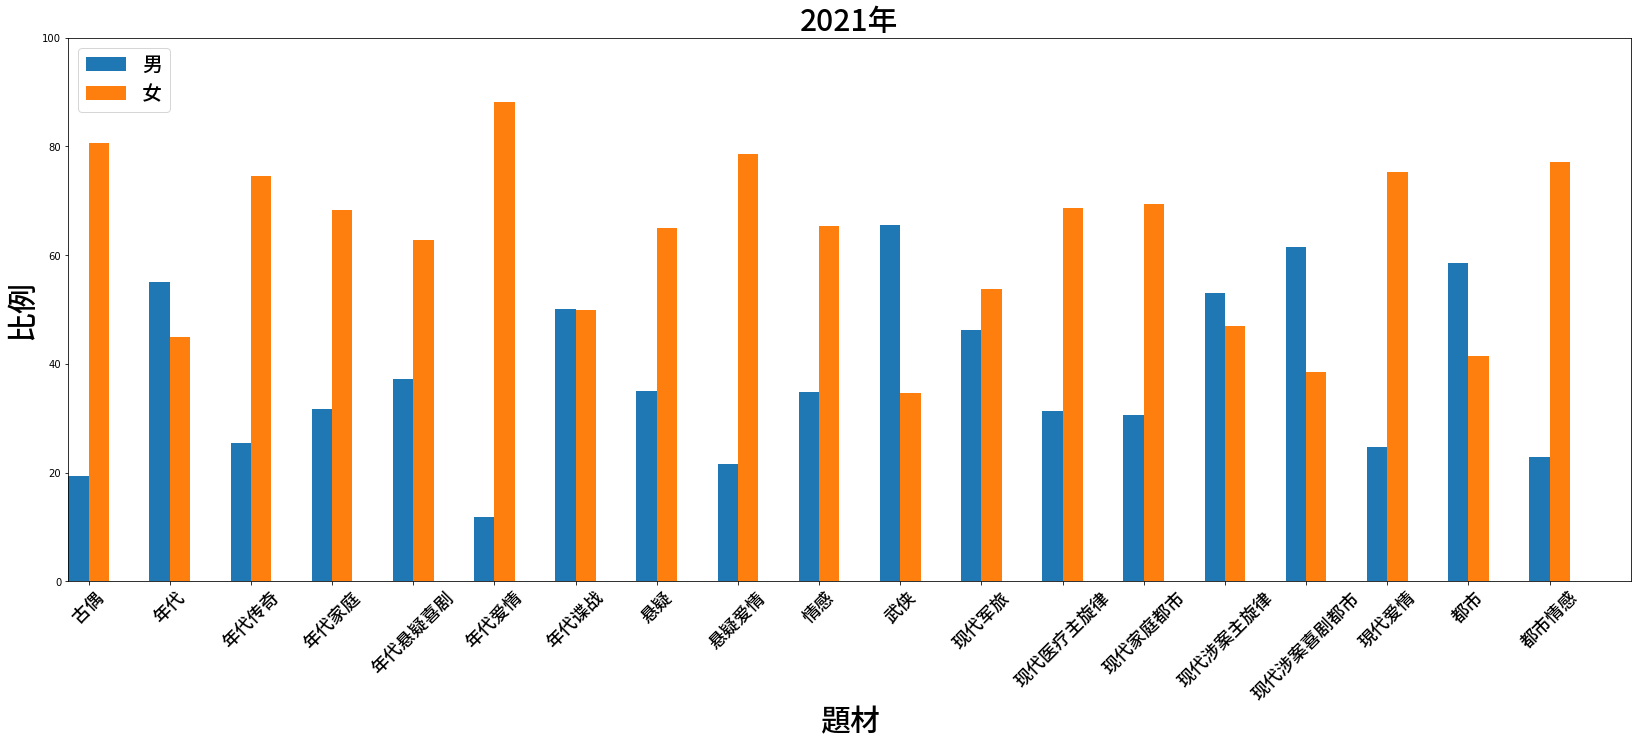

In [32]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font = FontProperties(fname=r'NotoSansTC-Medium.otf')
font1 = FontProperties(fname=r'NotoSansSC-Medium.otf')

plt.figure(figsize=(28, 10))

# 设置 x 轴类别和偏移量
x = data_grouped['題材']
bar_width = 0.25
index = range(len(x))
offset = bar_width / 2

# 绘制男生的条形图
plt.bar([i - offset for i in index], data_grouped['男(%)'], bar_width, label='男')
plt.xlim(-bar_width, len(x)) 
plt.ylim(0,100) 
# 绘制女生的条形图
plt.bar([i + offset for i in index], data_grouped['女(%)'], bar_width, label='女')

plt.xticks(index, x, fontproperties=font1, fontsize=18, rotation=45)

plt.title('2021年', fontproperties=font, fontsize=30)
plt.xlabel('題材', fontproperties=font, fontsize=30)
plt.ylabel('比例', fontproperties=font, fontsize=30)
plt.legend(loc='upper left', prop=FontProperties(fname=r'NotoSansTC-Medium.otf', size=20))
plt.show()


題材與年齡

dataframe
dataframe含'劇名''題材''日期''集數''年齡第一多''年齡第二多'

In [17]:
dataframe = pd.DataFrame({'劇名':name,'題材':Type,'日期':date,'年齡0':age,'年齡1':age1})
dataframe['題材'] = dataframe['題材'].str.replace('/', '')
dataframe['年齡0'] = dataframe['年齡0'].str.replace('岁', '')
dataframe['年齡1'] = dataframe['年齡1'].str.replace('岁', '')

In [18]:
dataframe['題材'] = dataframe['題材'].str.replace('.*武侠.*', '武侠', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*悬疑.*爱情.*', '悬疑爱情', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*现代.*悬疑.*', '悬疑', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*悬疑.*古代.*', '悬疑', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*现代.*爱情.*', '現代爱情', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*抗战.*', '抗战', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*古偶.*', '古偶', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*古代.*爱情.*', '古偶', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*甜宠古代.*', '古偶', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*爱情古代.*', '古偶', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*年代.*谍战.*', '年代谍战', regex=True)
dataframe['題材'] = dataframe['題材'].str.replace('.*现代都市情感.*', '都市情感', regex=True)
dataframe['題材'][42] = '现代军旅'

In [19]:
dataframe

,劇名,題材,日期,年齡0,年齡1
0,王牌部队,现代军旅,2021-12-26,25-34,19-24
1,雪中悍刀行,武侠,2021-12-15,25-34,19-24
2,风起洛阳,悬疑,2021-12-01,25-34,19-24
3,小敏家,现代家庭都市,2021-12-11,25-34,19-24
4,斛珠夫人,古偶,2021-11-10,19-24,25-34
5,谁是凶手,悬疑,2021-12-05,19-24,25-34
6,女心理师,都市情感,2021-11-23,19-24,25-34
7,沉睡花园,悬疑爱情,2021-12-13,19-24,25-34
8,良言写意,現代爱情,2021-11-30,19-24,25-34
9,陪你逐风飞翔,現代爱情,2021-11-22,19-24,25-34


In [20]:
# 计算不同年龄段的数量
count_grouped = dataframe.groupby(['題材', '年齡0']).size().unstack().reset_index()

# 补零处理
age_groups = ['19-24', '25-34']
for age_group in age_groups:
    if age_group not in count_grouped.columns:
        count_grouped[age_group] = 0
    count_grouped[age_group].fillna(0, inplace=True)

In [33]:
count_grouped['19-24'] = count_grouped['19-24'].astype(float)
count_grouped['25-34'] = count_grouped['25-34'].astype(float)
count_grouped['19-24'] = count_grouped['19-24'] +3
count_grouped['25-34'] = count_grouped['25-34'] +3

In [34]:
count_grouped

年齡0,題材,19-24,25-34,35-49
0,古偶,4.0,8.0,NaN
1,年代,3.0,4.0,NaN
2,年代传奇,3.0,4.0,NaN
3,年代家庭,3.0,4.0,NaN
4,年代悬疑喜剧,3.0,4.0,NaN
5,年代爱情,4.0,3.0,NaN
6,年代谍战,3.0,4.0,1.0
7,悬疑,6.0,7.0,NaN
8,悬疑爱情,5.0,3.0,NaN
9,情感,3.0,4.0,NaN


以題材做年齡(19-24/25-34)比例對照長條圖

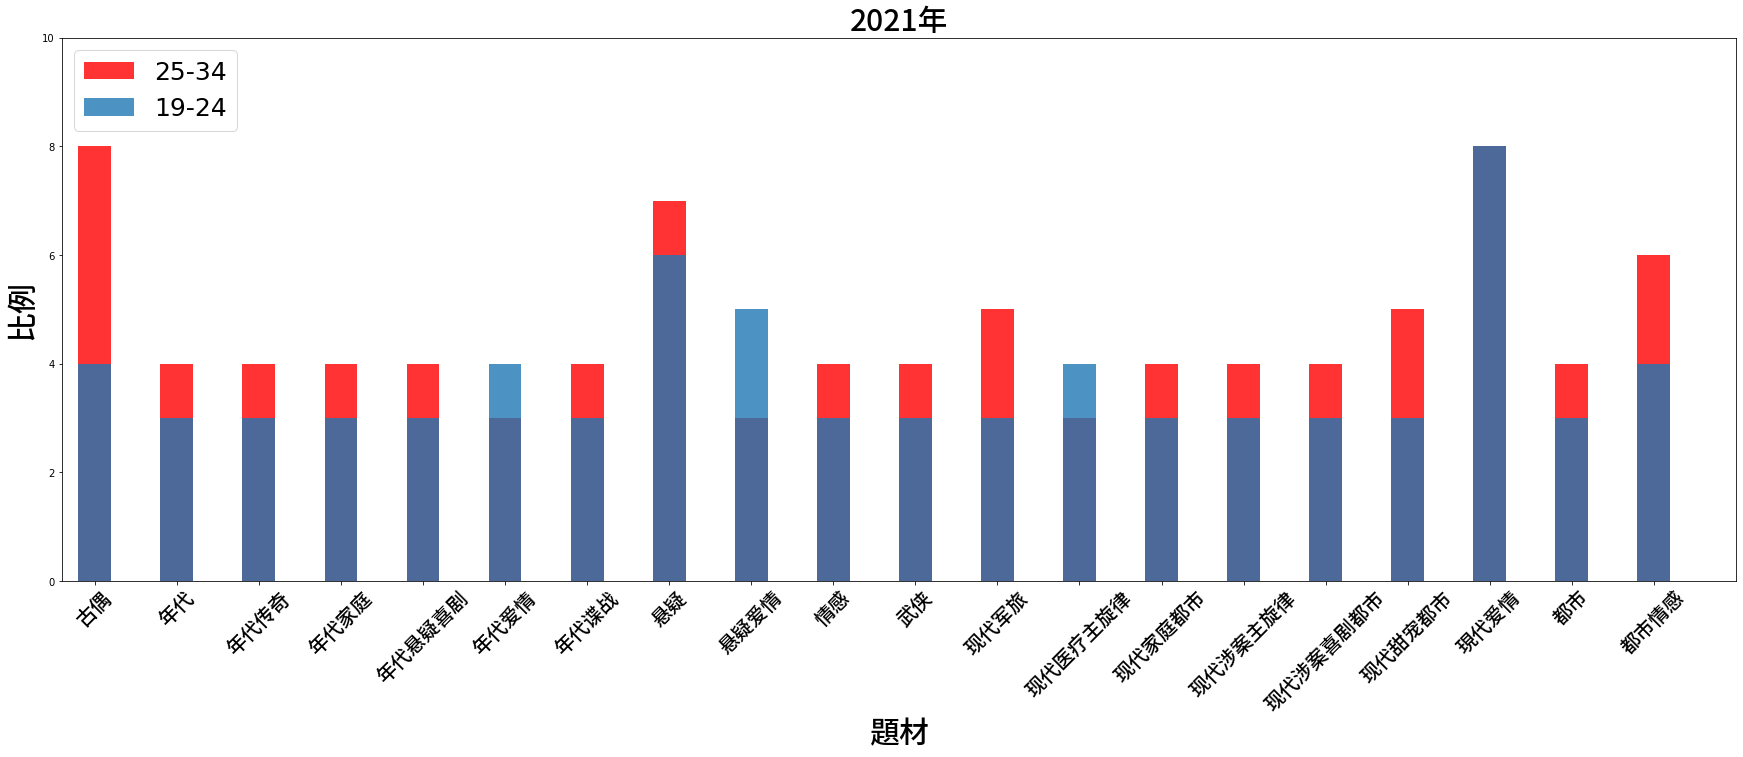

In [36]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font = FontProperties(fname=r'NotoSansTC-Medium.otf')
font1 = FontProperties(fname=r'NotoSansSC-Medium.otf')

plt.figure(figsize=(30, 10))

# 设置 x 轴类别
x = count_grouped['題材']

# 设置两个柱子的位置
bar_width = 0.4
index = range(len(x))

plt.bar(index, count_grouped['25-34'], bar_width, label='25-34',color='red',alpha = 0.8)
plt.bar(index, count_grouped['19-24'], bar_width, label='19-24',alpha = 0.8)

plt.xlim(-bar_width, len(x)) 
plt.ylim(0,10)# 将x轴范围向左偏移一个柱子的宽度
plt.xticks([i for i in index], x, fontproperties=font1, ha='center', fontsize=20, rotation=45)

plt.title('2021年', fontproperties=font, fontsize=30)
plt.xlabel('題材', fontproperties=font, fontsize=30)
plt.ylabel('比例', fontproperties=font, fontsize=30)
plt.legend(loc='upper left', prop={'size': 25})
plt.show()

題材與評分

In [24]:
def Data1(a):
    response = requests.get("https://d.guduodata.com/m/show/detail/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data4 = json.loads(data_string)
    Type1.append(data4['type'])
    Name.append(data4['show_name'])
    Date.append(data4['release_date'])
    
    response = requests.get("https://d.guduodata.com/m/media/douban_basic/"+str(a))
    soup = bs(response.text, "html.parser")
    data_string = soup.text
    data3 = json.loads(data_string)
    Score.append(data3['score'])

In [25]:
Name = []
Type1 = []
Date = []
Score = []
a2019 = [21694,14382,21609,22903,21436,14091,21986,22315,21271,22275,22274,22270,21478,21521,22855,17088,21748,13719,
         21526,22493,22394,22417,22927]

a2019_set = set(a2019)
b2019_set = set(b2019)
union_set = a2019_set.union(b2019_set)
union_list = list(union_set)

for i in range(71):
    Data1(union_list[i])

In [26]:
import pandas as pd
Data2019 = pd.DataFrame({'劇名':Name,'題材':Type1,'日期':Date,'豆瓣評分':Score})
Data2019['題材'] = Data2019['題材'].str.replace('/', '')
Data2019

,劇名,題材,日期,豆瓣評分
0,埃博拉前线,现代医疗主旋律,2021-12-08,0.0
1,城市的边缘,现代悬疑涉案推理,2021-04-28,8.3
2,若是一个人,None,2021-04-28,8.3
3,我是岁月你是星辰,现代爱情,2021-12-09,4.9
4,大江大河2,年代IP改编都市,2020-12-20,8.8
...,...,...,...,...
66,赖猫的狮子倒影,现代爱情言情都市,2021-12-30,4.3
67,突围,都市,2021-10-21,5.2
68,你好，对方辩友2,现代爱情,2021-01-14,7.8
69,第十二秒,现代悬疑,2021-10-18,5.8


In [27]:
Data2019[:60]

,劇名,題材,日期,豆瓣評分
0,埃博拉前线,现代医疗主旋律,2021-12-08,0.0
1,城市的边缘,现代悬疑涉案推理,2021-04-28,8.3
2,若是一个人,None,2021-04-28,8.3
3,我是岁月你是星辰,现代爱情,2021-12-09,4.9
4,大江大河2,年代IP改编都市,2020-12-20,8.8
5,终极笔记,现代探险青春,2020-12-10,8.2
6,前行者,年代谍战,2021-10-22,6.1
7,如果声音有记忆,现代爱情,2021-12-09,5.5
8,十八年后的终极告白,现代悬疑爱情,2020-12-09,7.8
9,战火熔炉,年代主旋律抗战军旅,2020-10-24,8.3


In [28]:
Data2019['題材'] = Data2019['題材'].str.replace('.*武侠.*', '武侠', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*悬疑.*爱情.*', '悬疑爱情', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*悬疑.*', '悬疑', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*悬疑.*古代.*', '悬疑', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代.*爱情.*', '現代爱情', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*抗战.*', '抗战', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*古偶.*', '古偶', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*古代.*爱情.*', '古偶', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*甜宠古代.*', '古偶', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*爱情古代.*', '古偶', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*年代.*谍战.*', '年代谍战', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代都市情感.*', '都市情感', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*都市情感.*', '都市情感', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*年代主旋律.*', '年代', regex=True)
Data2019['題材'] = Data2019['題材'].str.replace('.*现代涉案.*', '现代涉案', regex=True)

Data2019['題材'][24] = '现代军旅'
Data2019['題材'][2] = '都市情感'

Data2019

C:\Users\User\AppData\Local\Temp\ipykernel_21616\585392330.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2019['題材'][24] = '现代军旅'
C:\Users\User\AppData\Local\Temp\ipykernel_21616\585392330.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2019['題材'][2] = '都市情感'


,劇名,題材,日期,豆瓣評分
0,埃博拉前线,现代医疗主旋律,2021-12-08,0.0
1,城市的边缘,悬疑,2021-04-28,8.3
2,若是一个人,都市情感,2021-04-28,8.3
3,我是岁月你是星辰,現代爱情,2021-12-09,4.9
4,大江大河2,年代IP改编都市,2020-12-20,8.8
...,...,...,...,...
66,赖猫的狮子倒影,現代爱情,2021-12-30,4.3
67,突围,都市,2021-10-21,5.2
68,你好，对方辩友2,現代爱情,2021-01-14,7.8
69,第十二秒,悬疑,2021-10-18,5.8


In [29]:
Data2019['豆瓣評分'][0]=7.4
Data2019['豆瓣評分'][30]=5.0
Data2019['豆瓣評分'][35]=4.0
Data2019['豆瓣評分'][58]=7.9

C:\Users\User\AppData\Local\Temp\ipykernel_21616\2737073951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2019['豆瓣評分'][0]=7.4
C:\Users\User\AppData\Local\Temp\ipykernel_21616\2737073951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2019['豆瓣評分'][30]=5.0
C:\Users\User\AppData\Local\Temp\ipykernel_21616\2737073951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2019['豆瓣評分'][35]=4.0
C:\Users\User\AppData\Local\T

In [30]:
Data2019['豆瓣評分'] = Data2019['豆瓣評分'].astype(float)
data_grouped2 = Data2019.groupby('題材')['豆瓣評分'].mean().reset_index()
data_grouped2

,題材,豆瓣評分
0,IP改编古代,8.600000
1,主旋律,8.200000
2,古偶,4.666667
3,喜剧爱情奇幻,7.200000
4,年代,7.100000
5,年代IP改编都市,8.800000
6,年代传奇,6.000000
7,年代家庭,7.700000
8,年代悬疑喜剧,2.900000
9,年代爱情,4.600000


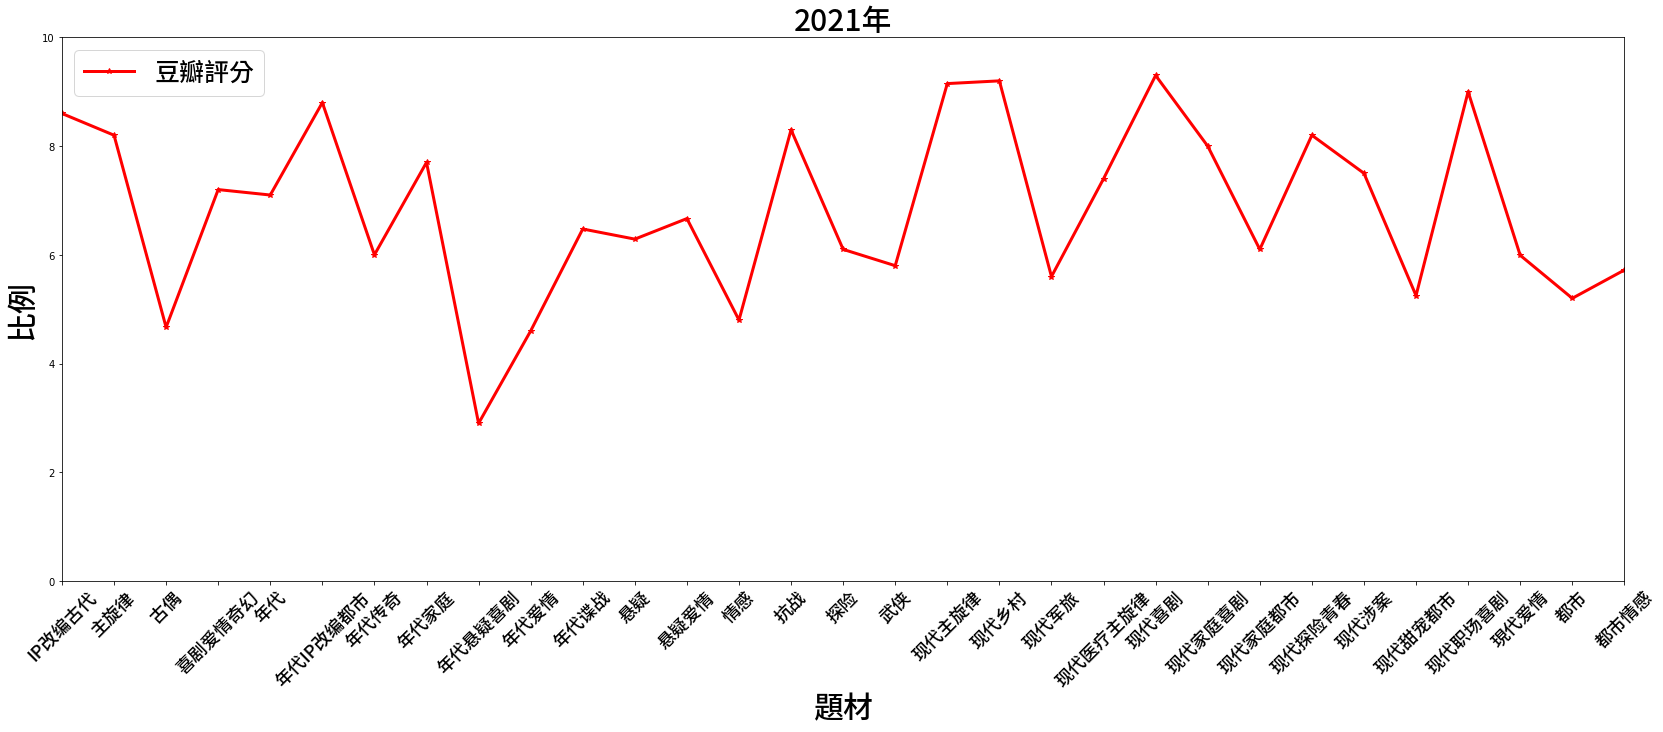

In [37]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font = FontProperties(fname=r'NotoSansTC-Medium.otf')
font1 = FontProperties(fname=r'NotoSansSC-Medium.otf')

plt.figure(figsize=(28, 10))

# 设置 x 轴类别
x = data_grouped2['題材']

index = range(len(x))

plt.plot(index, data_grouped2['豆瓣評分'], marker='*', c='r', label='豆瓣評分', linewidth=3)

plt.xlim(0, len(x) - 1)  # 調整x軸範圍，從最左側的數據點開始
plt.ylim(0, 10)
plt.xticks(index, x, fontproperties=font1, ha='center', fontsize=18, rotation=45)

plt.title('2021年', fontproperties=font, fontsize=30)
plt.xlabel('題材', fontproperties=font, fontsize=30)
plt.ylabel('比例', fontproperties=font, fontsize=30)
plt.legend(loc='upper left', prop=FontProperties(fname=r'NotoSansTC-Medium.otf', size=25), fontsize=50)
plt.show()
